In [167]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sea
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [168]:
data = pandas.read_csv("/content/housing_price_data.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [170]:
data["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [171]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [172]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc4afbcf110>,
      dtype=object)

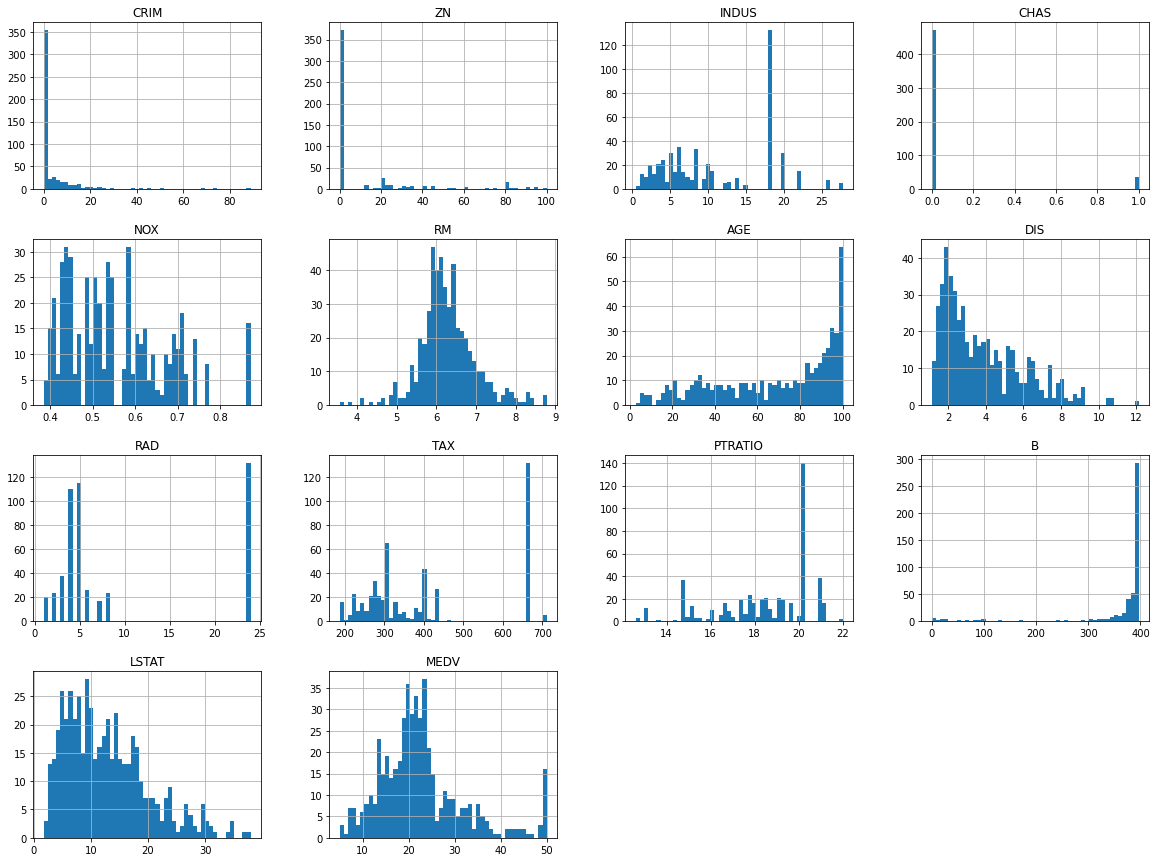

In [173]:
data.hist(bins = 50, figsize = (20, 15))

In [174]:
strat_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 2)
for X_idx, Y_idx in strat_split.split(data, data["CHAS"]):
    X = data.loc[X_idx]
    test = data.loc[Y_idx]

In [175]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.772594,11.175743,11.357673,0.069307,0.559943,6.250797,69.058168,3.720899,9.898515,414.826733,18.417079,353.252772,12.991386,22.348762
std,8.961523,23.379278,6.778923,0.254290,0.118819,0.708119,27.875219,2.047692,8.855168,169.565317,2.186237,95.428391,7.240941,8.884644
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.287500,0.000000,0.458000,5.870750,45.750000,2.097050,4.000000,284.000000,16.975000,372.890000,7.385000,17.075000
50%,0.284560,0.000000,9.900000,0.000000,0.538000,6.173000,78.600000,3.092200,5.000000,345.000000,18.900000,391.600000,11.675000,21.000000
75%,4.128648,12.500000,18.100000,0.000000,0.635000,6.629250,94.025000,5.104475,24.000000,666.000000,20.200000,396.157500,17.120000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


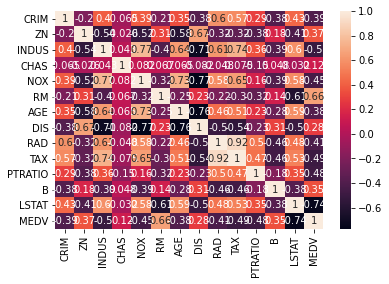

In [176]:
corr_matrix = X.corr()
sea.heatmap(corr_matrix, annot = True)

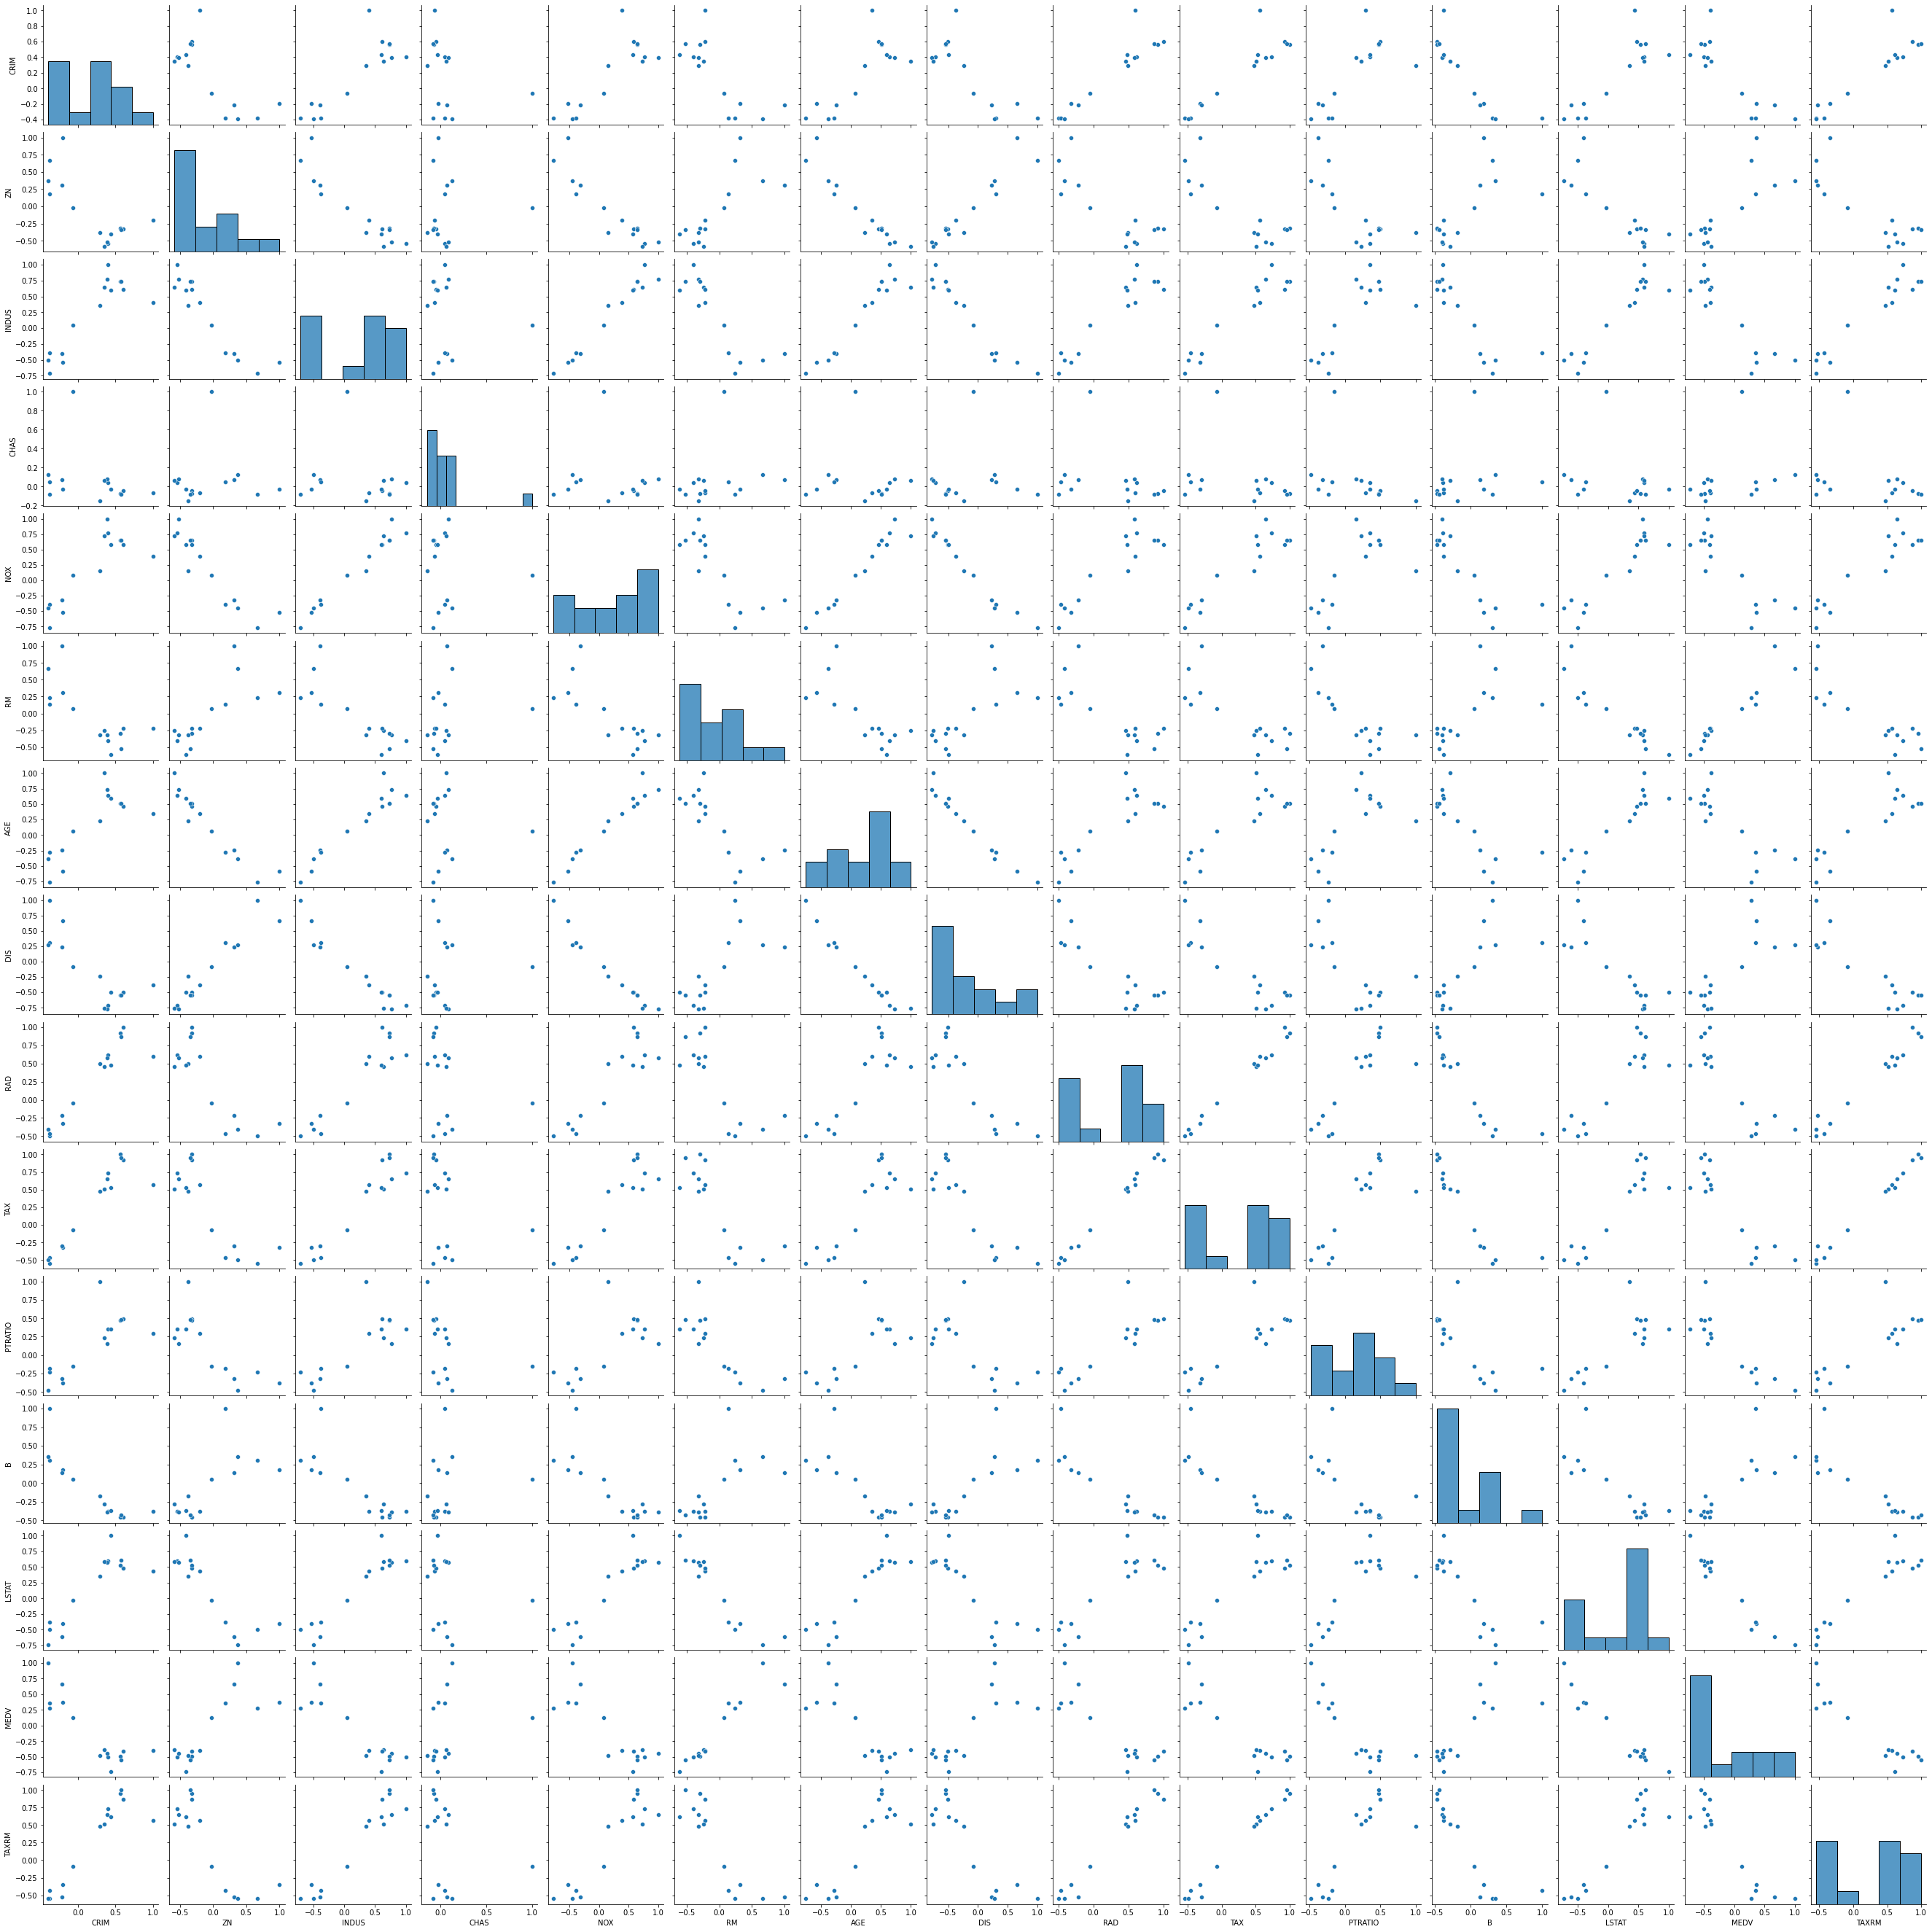

In [192]:
sea.pairplot(corr_matrix) 

In [ ]:
corr_matrix["MEDV"].sort_values()

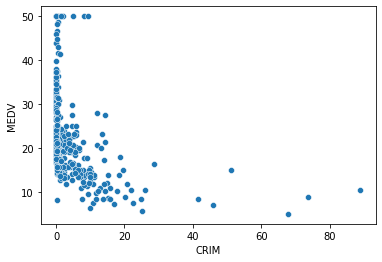

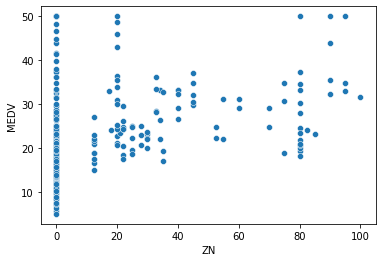

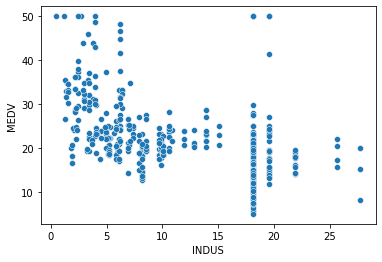

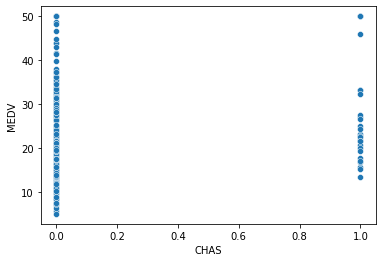

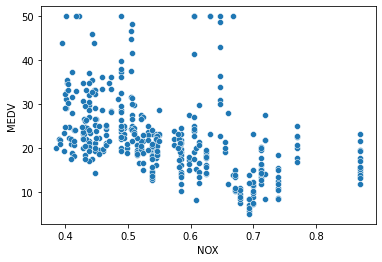

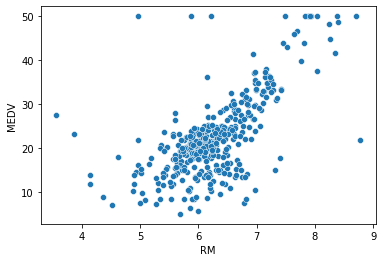

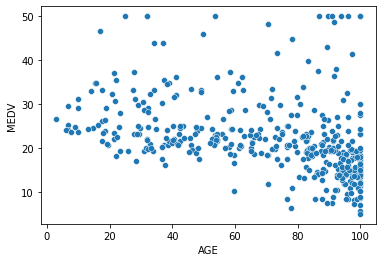

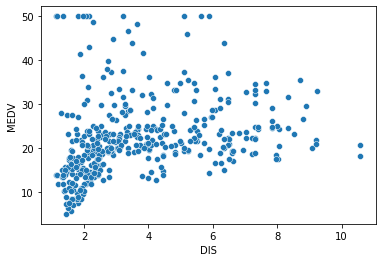

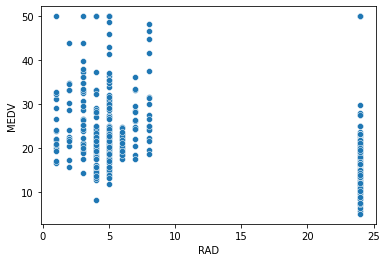

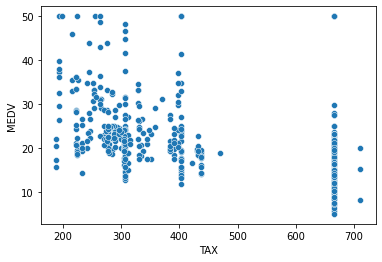

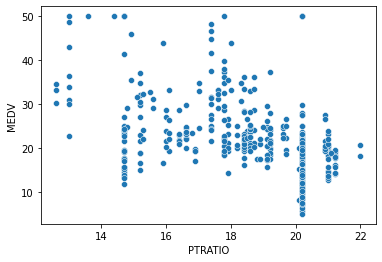

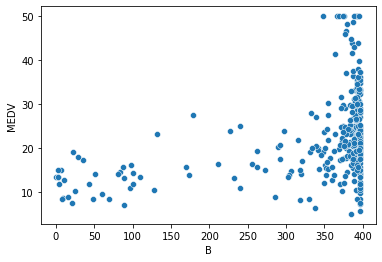

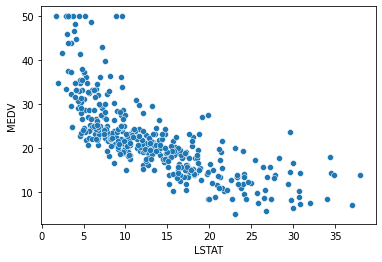

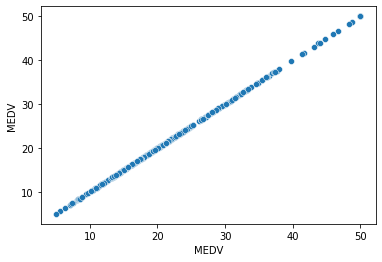

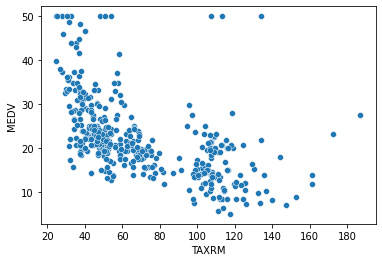

In [193]:
for col in X.columns:
    sea.scatterplot(x = X[col], y = X["MEDV"])
    plt.show()

In [ ]:
X["TAXRM"] = X["TAX"] / X["RM"]
test["TAXRM"] = test["TAX"] / test["RM"]
corr_matrix = X.corr()
corr_matrix["MEDV"].sort_values()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(
    [
     ("Inputer", SimpleImputer(strategy = "median")),
     ("Std_Scaler", StandardScaler())
    ]
)

In [ ]:
X_train = X.drop(columns = ["MEDV"])
y_train = X["MEDV"]

X_test = test.drop(columns = ["MEDV"])
y_test = test["MEDV"]

In [ ]:
X_train.describe()

In [ ]:
# X_train.drop(columns = "TAX", inplace = True)
# X_test.drop(columns = "TAX", inplace= True)

In [ ]:
X_train = pipe.fit_transform(X_train)

In [ ]:
X_test = pipe.transform(X_test)


In [ ]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [188]:
val_scores = cross_val_score(dtr, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
rmse_score = np.sqrt(-val_scores)
print(rmse_score, rmse_score.mean())


[6.33913964 3.19689278 4.36330094 3.89220494 4.51498893] 4.461305443561393


In [189]:
val_scores = cross_val_score(lr, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
rmse_score = np.sqrt(-val_scores)
print(rmse_score, rmse_score.mean())


[4.75521192 4.78454038 4.67189115 3.44734514 3.34797374] 4.201392464705279


In [190]:
val_scores = cross_val_score(rf, X_train, y_train, scoring = "neg_mean_squared_error", cv = 5)
rmse_score = np.sqrt(-val_scores)
print(rmse_score, rmse_score.mean())


[4.90531301 2.96652226 3.51803439 2.9912696  2.86632616] 3.4494930842338585


In [191]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, y_test)))

3.565846379467402
